Importing necessary dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 

Data Loading

In [2]:
df=pd.read_csv('loan_eligibility_dataset.csv')

Understanding the data - EDA

In [3]:
df

,Customer_ID,Gender,Married,Age,Income,Loan_Amount,Loan_Term,Credit_Score,Defaulted
0,2760,Female,Yes,37.0,40228.0,104841.0,120,718.0,No
1,4035,Male,Yes,27.0,60687.0,118652.0,84,664.0,Yes
2,2921,Male,Yes,55.0,28701.0,161272.0,120,718.0,No
3,2188,Male,No,19.0,28351.0,194405.0,36,659.0,No
4,1109,Male,Yes,NaN,NaN,NaN,84,NaN,Yes
...,...,...,...,...,...,...,...,...,...
4295,4444,Female,Yes,55.0,55244.0,118255.0,120,646.0,No
4296,1466,Female,No,33.0,36066.0,150016.0,12,749.0,No
4297,4092,Male,No,34.0,56932.0,152238.0,120,667.0,Yes
4298,4772,Female,No,36.0,42144.0,103661.0,60,599.0,No


Duplicates Removal

In [4]:
df.duplicated().sum()

np.int64(100)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.shape

(4200, 9)

Missing values

In [8]:
df.isna().sum()

Customer_ID       0
Gender            0
Married           0
Age             210
Income          209
Loan_Amount     210
Loan_Term         0
Credit_Score    210
Defaulted         0
dtype: int64

In [9]:
df.isna().sum()/len(df)*100

Customer_ID     0.00000
Gender          0.00000
Married         0.00000
Age             5.00000
Income          4.97619
Loan_Amount     5.00000
Loan_Term       0.00000
Credit_Score    5.00000
Defaulted       0.00000
dtype: float64

In [10]:
df.drop(columns='Customer_ID', inplace=True)

In [11]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Income']=df['Income'].fillna(df['Income'].median())
df['Loan_Amount']=df['Loan_Amount'].fillna(df['Loan_Amount'].median())
df['Credit_Score']=df['Credit_Score'].fillna(df['Credit_Score'].mode()[0])

In [12]:
df.isna().sum()

Gender          0
Married         0
Age             0
Income          0
Loan_Amount     0
Loan_Term       0
Credit_Score    0
Defaulted       0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4200 entries, 0 to 4299
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        4200 non-null   object 
 1   Married       4200 non-null   object 
 2   Age           4200 non-null   float64
 3   Income        4200 non-null   float64
 4   Loan_Amount   4200 non-null   float64
 5   Loan_Term     4200 non-null   int64  
 6   Credit_Score  4200 non-null   float64
 7   Defaulted     4200 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 295.3+ KB


In [14]:
df.describe()

,Age,Income,Loan_Amount,Loan_Term,Credit_Score
count,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000
mean,34.557857,52113.157857,150471.152857,64.148571,701.526905
std,10.836088,34439.947957,29373.897790,38.184282,47.972513
min,2.000000,-8836.000000,40943.000000,12.000000,535.000000
25%,28.000000,40608.250000,131277.000000,36.000000,670.000000
50%,34.000000,49947.000000,150541.000000,60.000000,704.000000
75%,41.000000,59526.500000,169398.750000,84.000000,733.000000
max,100.000000,503330.000000,284372.000000,120.000000,895.000000


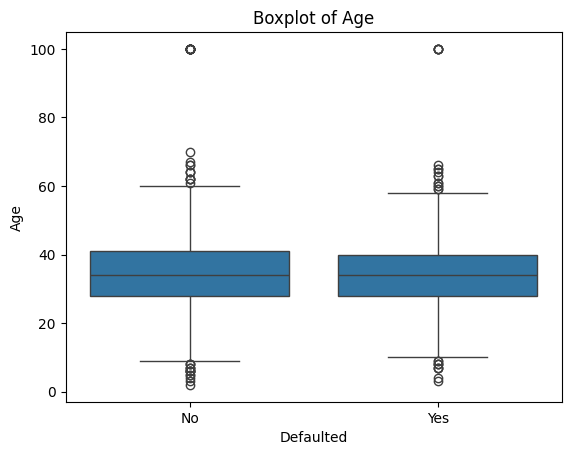

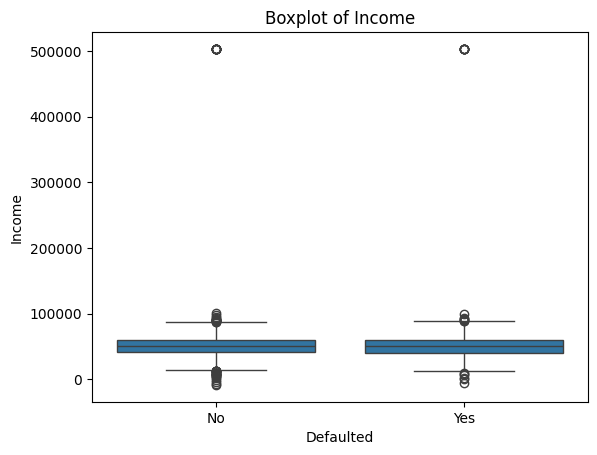

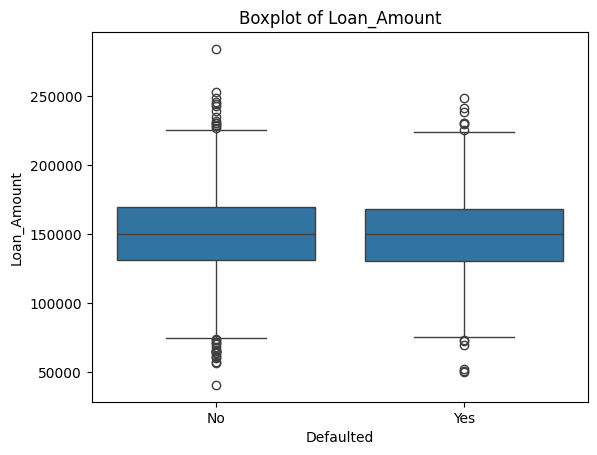

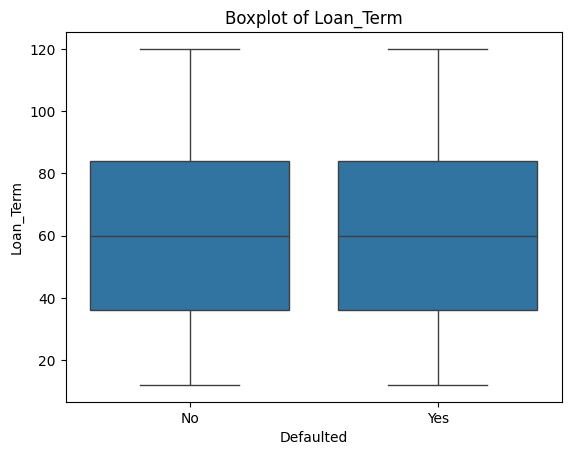

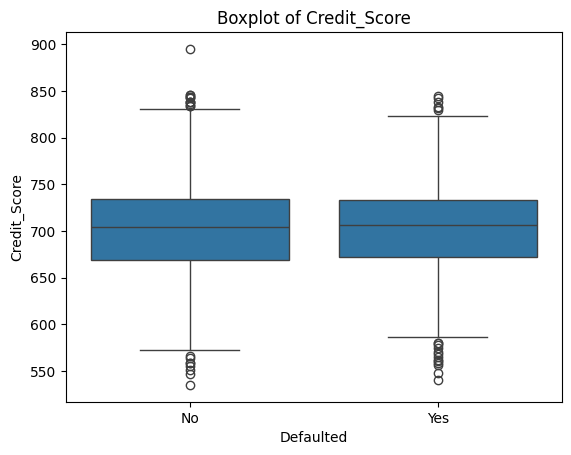

In [15]:
for i in df:
    if df[i].dtype in ['float','int']:
        sns.boxplot(y=df[i], x=df['Defaulted'])
        plt.title(f"Boxplot of {i}") 
        plt.show()

Remove Outliers

In [16]:
# Age outlier

df=df[(df['Age']>=18)&(df['Age']<=90)].copy()

In [17]:
# Income outlier

# Remove invalid income values (like negatives)
df = df[df['Income'] >= 0].copy()

# Optional: Cap outliers instead of removing them using IQR
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip values instead of dropping rows
df['Income'] = df['Income'].clip(lower=lower_bound, upper=upper_bound)


In [18]:
# Loan amount Outlier

Q1 = df['Loan_Amount'].quantile(0.25)
Q3 = df['Loan_Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip values instead of dropping rows
df['Loan_Amount'] = df['Loan_Amount'].clip(lower=lower_bound, upper=upper_bound)

In [19]:
# Credit score outlier

Q1 = df['Credit_Score'].quantile(0.25)
Q3 = df['Credit_Score'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip values instead of dropping rows
df['Credit_Score'] = df['Credit_Score'].clip(lower=lower_bound, upper=upper_bound)

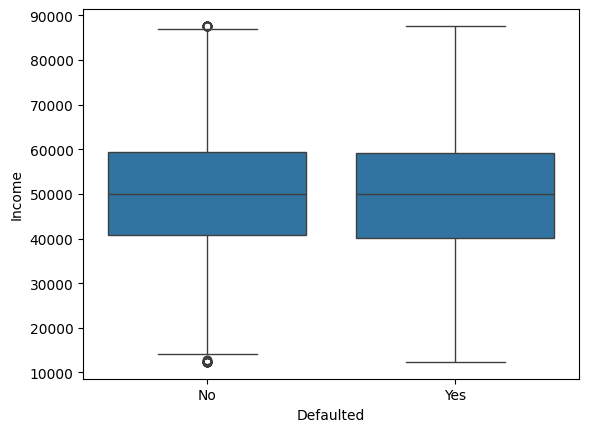

In [20]:
sns.boxplot(y=df['Income'], x=df['Defaulted'])
plt.show()

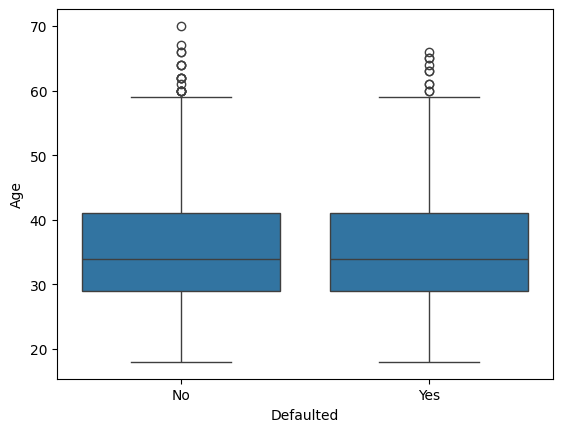

In [21]:
sns.boxplot(y=df['Age'], x=df['Defaulted'])
plt.show()

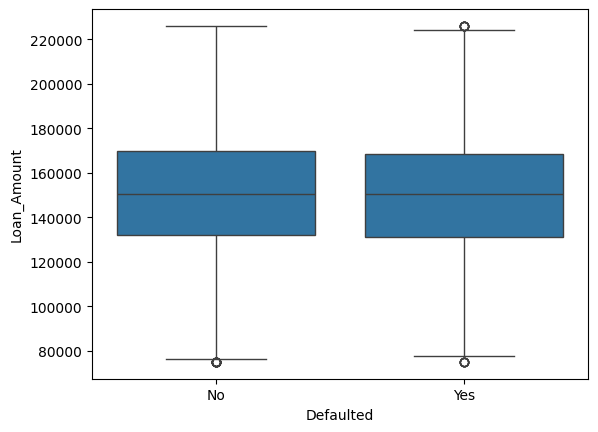

In [22]:
sns.boxplot(y=df['Loan_Amount'], x=df['Defaulted'])
plt.show()

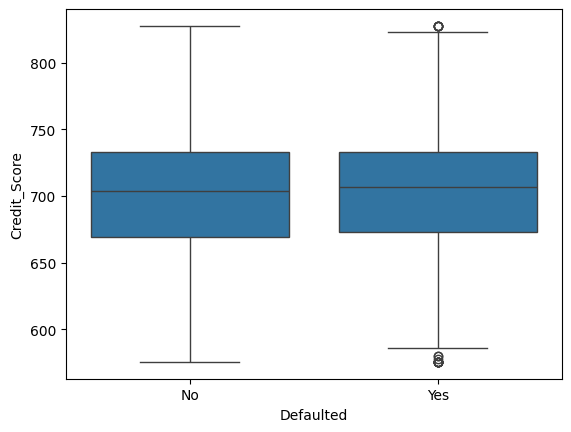

In [23]:
sns.boxplot(y=df['Credit_Score'], x=df['Defaulted'])
plt.show()

Encoding

In [24]:
df.shape

(3973, 8)

In [25]:
df.head()

,Gender,Married,Age,Income,Loan_Amount,Loan_Term,Credit_Score,Defaulted
0,Female,Yes,37.0,40228.0,104841.0,120,718.0,No
1,Male,Yes,27.0,60687.0,118652.0,84,664.0,Yes
2,Male,Yes,55.0,28701.0,161272.0,120,718.0,No
3,Male,No,19.0,28351.0,194405.0,36,659.0,No
4,Male,Yes,34.0,49947.0,150541.0,84,710.0,Yes


In [26]:
df['Defaulted'].unique()

array(['No', 'Yes'], dtype=object)

In [27]:
df['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [29]:
le_Married=LabelEncoder()   # seperate instance for each categoricals
le_Defaulted=LabelEncoder()
le_Gender=LabelEncoder()

In [30]:
df['Married']=le_Married.fit_transform(df['Married'])
df['Defaulted']=le_Defaulted.fit_transform(df['Defaulted'])
df['Gender']=le_Gender.fit_transform(df['Gender'])

In [31]:
df

,Gender,Married,Age,Income,Loan_Amount,Loan_Term,Credit_Score,Defaulted
0,0,1,37.0,40228.0,104841.0,120,718.0,0
1,1,1,27.0,60687.0,118652.0,84,664.0,1
2,1,1,55.0,28701.0,161272.0,120,718.0,0
3,1,0,19.0,28351.0,194405.0,36,659.0,0
4,1,1,34.0,49947.0,150541.0,84,710.0,1
...,...,...,...,...,...,...,...,...
4295,0,1,55.0,55244.0,118255.0,120,646.0,0
4296,0,0,33.0,36066.0,150016.0,12,749.0,0
4297,1,0,34.0,56932.0,152238.0,120,667.0,1
4298,0,0,36.0,42144.0,103661.0,60,599.0,0


Scaling

In [32]:
X=df.drop('Defaulted', axis=1) # All features
y=df['Defaulted']  # Target label

In [33]:
minmax=MinMaxScaler()

In [34]:
X_scaled=minmax.fit_transform(X)

In [35]:
X_scaled

array([[0.        , 1.        , 0.36538462, ..., 0.19802537, 1.        ,
        0.56547619],
       [1.        , 1.        , 0.17307692, ..., 0.28947926, 0.66666667,
        0.35119048],
       [1.        , 1.        , 0.71153846, ..., 0.57170101, 1.        ,
        0.56547619],
       ...,
       [1.        , 0.        , 0.30769231, ..., 0.51187954, 1.        ,
        0.36309524],
       [0.        , 0.        , 0.34615385, ..., 0.19021163, 0.44444444,
        0.09325397],
       [0.        , 0.        , 0.28846154, ..., 0.64783864, 1.        ,
        0.45833333]], shape=(3973, 7))

Data Splitting

In [36]:
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y,test_size=0.3, random_state=42, stratify=y)

KNN

In [37]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [38]:
y_pred=knn.predict(X_test)

In [39]:
print(round(accuracy_score(y_test, y_pred)*100,2),"%",sep=' ')

64.85 %


SVM

In [40]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

In [41]:
svm_model.fit(X_train, y_train)


SVC()

In [42]:
y_pred_svm = svm_model.predict(X_test)


In [43]:
print(round(accuracy_score(y_test, y_pred)*100,2),"%",sep=' ')

64.85 %


In [44]:
df['Defaulted'].value_counts()

Defaulted
0    2825
1    1148
Name: count, dtype: int64

Verdict:

**_Data is imbalanced. Hence the poor performance._**

Confusion Matrix

|               | Predicted 0       | Predicted 1       |
|---------------|-------------------|-------------------|
| **Actual 0**  | True Negative     | False Positive    |
| **Actual 1**  | False Negative    | True Positive     |


In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_svm)

array([[848,   0],
       [344,   0]])

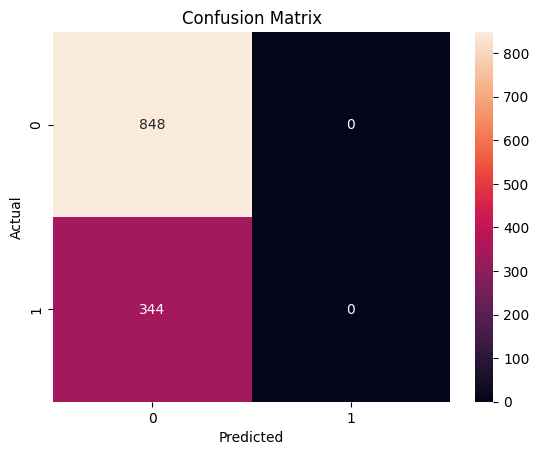

In [46]:
sns.heatmap(confusion_matrix(y_test,y_pred_svm), annot=True,fmt='d') # fmt parameter to avoid exponentials
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

*_Key Evalutaion Metrics in a Classification Model:_*

| Metric        | Formula                                      | Best For                      |
|---------------|----------------------------------------------|-------------------------------|
| Accuracy      | (TP + TN) / (TP + TN + FP + FN)              | Overall performance           |
| Precision     | TP / (TP + FP)                               | Avoiding false positives -  Of all predicted positives, how many were actually positive? Useful when **false positives** are costly (e.g., spam detection).     |
| Recall        | TP / (TP + FN)                               | Avoiding false negatives -  Of all actual positives, how many did we correctly predict? Useful when **false negatives** are costly (e.g., cancer diagnosis).      |
| F1-Score      | 2 * (P * R) / (P + R)                        | Balanced metric - Harmonic mean of Precision and Recall. Balances the trade-off between precision and recall.               |
| Specificity   | TN / (TN + FP)                               | True negative rate            |
| ROC-AUC       | Score between 0.5 and 1.0                    | Class separability measure -> Measures the model's ability to separate classes at all thresholds.- AUC = 1.0 → perfect model  - AUC = 0.5 → random guessing   |



In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm,zero_division=0))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       848
           1       0.00      0.00      0.00       344

    accuracy                           0.71      1192
   macro avg       0.36      0.50      0.42      1192
weighted avg       0.51      0.71      0.59      1192



Sampling Techniques - to fix class imbalance : 

**1. Undersampling**

In [49]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
under_sampler=RandomUnderSampler()
X_under,y_under=under_sampler.fit_resample(X_scaled,y) # type: ignore

In [ ]:
y_under.value_counts()

In [ ]:
X_train_u, X_test_u, y_train_u, y_test_u= train_test_split(X_under,y_under,test_size=0.3)

In [ ]:
knn_model_u=KNeighborsClassifier()
knn_model_u.fit(X_train_u,y_train_u)

In [ ]:
y_pred_knn=knn_model_u.predict(X_test_u)

In [ ]:
print(classification_report(y_test_u,y_pred_knn))

In [ ]:
svm_model_u=SVC()
svm_model_u.fit(X_train_u,y_train_u)

In [ ]:
y_pred_svm=svm_model_u.predict(X_test_u)

In [ ]:
print(classification_report(y_test_u,y_pred_svm))

**2. Oversampling**

In [50]:
over_sampler=RandomUnderSampler()
X_over,y_over=over_sampler.fit_resample(X_scaled,y)  # type: ignore

In [51]:
y_over.value_counts()

Defaulted
0    1148
1    1148
Name: count, dtype: int64

In [52]:
X_train_o, X_test_o, y_train_o, y_test_o= train_test_split(X_over,y_over,test_size=0.3)

In [53]:
knn_model_o=KNeighborsClassifier()
knn_model_o.fit(X_train_o,y_train_o)

KNeighborsClassifier()

In [54]:
y_pred_knn=knn_model_o.predict(X_test_o)

In [55]:
print(classification_report(y_test_o,y_pred_knn))

              precision    recall  f1-score   support

           0       0.51      0.47      0.49       357
           1       0.48      0.52      0.49       332

    accuracy                           0.49       689
   macro avg       0.49      0.49      0.49       689
weighted avg       0.49      0.49      0.49       689



In [56]:
svm_model_u=SVC()
svm_model_u.fit(X_train_o,y_train_o)

SVC()

In [57]:
y_pred_svm=svm_model_u.predict(X_test_o)

In [58]:
print(classification_report(y_test_o,y_pred_svm))

              precision    recall  f1-score   support

           0       0.52      0.33      0.40       357
           1       0.48      0.67      0.56       332

    accuracy                           0.49       689
   macro avg       0.50      0.50      0.48       689
weighted avg       0.50      0.49      0.48       689



**SMOTE (Synthetic Minority Oversampling Technique)**  Distance based sampling similar to KNN

It is an Oversampling technique used in ML to handle imbalanced datasets, especially in classification problems where one class is under represented. 

SMOTE creates synthetic examples of minority class instead of simply duplicating them.

In [59]:
from imblearn.over_sampling import SMOTE